## Market Basket Analysis for E-Commerce
### By
### Ezulu Priscilla Chinwendu

 In this project, I performed market basket analysis to uncover patterns in customer purchasing behaviour. I identified which products tend to be bought together to enable the organisation make informed decisions to improve sales and customer satisfaction.



## 1. Data Preparation

In [5]:
#Import necessary libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
#load and view the dataset
df = pd.read_csv('Market Basket Analysis - Groceries_dataset.csv')
df.head(20)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


## 2. Exploratory Data Analysis

In [7]:
#check the last and first data of 
#max_date = df['Date'].max()
#min_date = df['Date'].min()

#max_date

In [8]:
#min_date

In [9]:
# To view information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [47]:
#coverting date column to datetime and member_number column to string
df['Member_number'] = df['Member_number'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Member_number      38765 non-null  object        
 1   Date               38765 non-null  datetime64[ns]
 2   itemDescription    38765 non-null  object        
 3   Month              38765 non-null  object        
 4   uniqueTransaction  38765 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.5+ MB


In [12]:
#df.columns


In [13]:
#check for null values
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [14]:
#check for duplicates
df['itemDescription'].duplicated().sum()

38598

In [15]:
#cheque the no of unique items in item description column
df['itemDescription'].nunique()

167

## 3. Analysis and Visualization

 ### Member Purchase Analysis

In [16]:
#Total no of purchase per member
member_purchase_counts = df['Member_number'].value_counts()
member_purchase_counts 

3180    36
3737    33
3050    33
2051    33
2625    31
        ..
2503     2
3301     2
1775     2
3723     2
2417     2
Name: Member_number, Length: 3898, dtype: int64

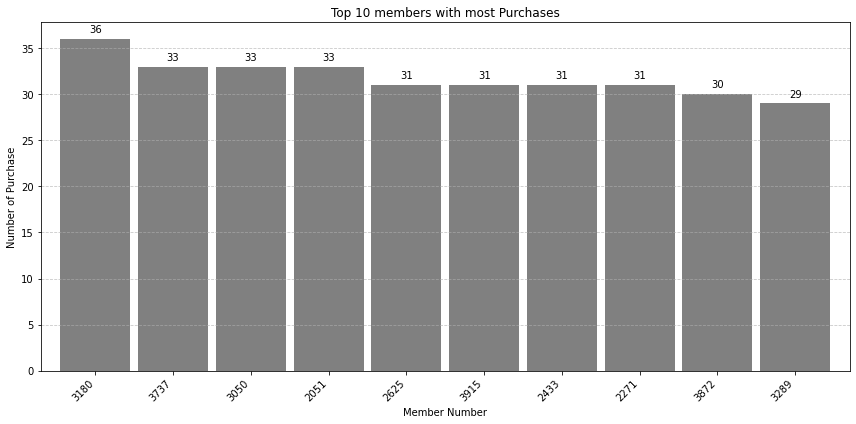

In [17]:
#The top 10 members with most purchases
top_members = member_purchase_counts.head(10)
plt.figure(figsize=(12, 6))

bars = top_members.plot(kind='bar', color='grey', width=0.9)
ticks_positions = range(len(top_members))
ticks_labels = top_members.index
plt.xticks(ticks_positions, ticks_labels, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Member Number')
plt.ylabel('Number of Purchase')
plt.title('Top 10 members with most Purchases')

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(int(bar.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Member 3180 leads with 36 purchases, followed closely by 3737, 3050, and 2051, each with 33 purchases, indicating varying degrees of active engagement among top purchasers.

### Date-Based Analysis

In [18]:
# Monthly Purchase Dustribution
# Mapping dictionary for month names
month_names = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sept", 10:"Oct", 11:"Nov", 12:"Dec"}
df['Month'] =df['Date'].dt.month.map(month_names)
monthly_purchase_counts =  df['Month'].value_counts().reindex(month_names.values()).fillna(0)
monthly_purchase_counts

Jan     3324
Feb     2997
Mar     3133
Apr     3260
May     3408
Jun     3264
Jul     3300
Aug     3496
Sept    3059
Oct     3261
Nov     3254
Dec     3009
Name: Month, dtype: int64

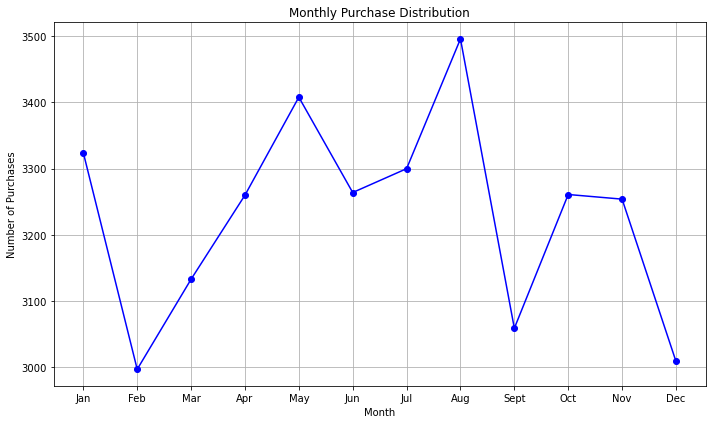

In [19]:
# Visualizing the monthly purchase distribution
plt.figure(figsize=(10, 6))
plt.plot(monthly_purchase_counts.index, monthly_purchase_counts.values, marker='o', color='blue')
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.title('Monthly Purchase Distribution')
plt.tight_layout()
plt.show()


August records the peak month for purchases with approximately 3500 transactions,followed by May with approximately 3400 transactions, while February denotes the lowest activity, around 2990 purchases, showcasing fluctuations in buying behavior across months.

### Item Description Analysis

In [20]:
# To 10 check for the most Purchased Items
ten_most_purchased_items = df['itemDescription'].value_counts().head(10)
ten_most_purchased_items

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

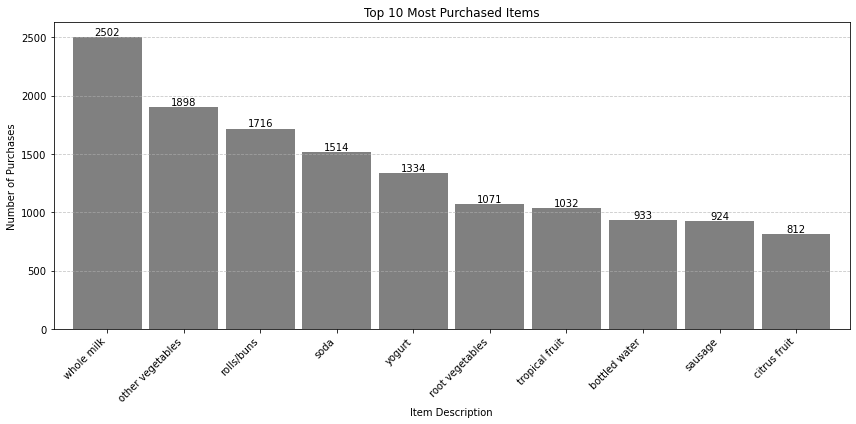

In [21]:
# Visaulizing the top 10 most purchased items
plt.figure(figsize=(12, 6))
bars = ten_most_purchased_items.plot(kind='bar', color='grey', width=0.9)
ticks_positions = range(len(ten_most_purchased_items))
ticks_labels = ten_most_purchased_items.index
plt.xticks(ticks_positions, ticks_labels, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Item Description')
plt.ylabel('Number of Purchases')
plt.title('Top 10 Most Purchased Items')
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(int(bar.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Top and Least Purchased Items
1. Popular Items: Whole milk emerges as the most sought-after item, purchased 2502 times, signifying its popularity among customers.
2. Less Popular Items: Citrus fruits record the lowest purchase count at 812, indicating a comparatively lower demand for this product

In [22]:
# To calculate the average no of items per purchase
avg_items_per_purchase = df.groupby(['Member_number', 'Date']).size().mean()
print("Average Number of Items per Purchase: {:.2f}".format(avg_items_per_purchase))

Average Number of Items per Purchase: 2.59


## 4. Market Basket Analysis

In [23]:
# Group items purchased per customer per day
df['uniqueTransaction'] = df.groupby(['Member_number','Date'])['itemDescription'].transform(lambda x: ' '.join(x))
df

,Member_number,Date,itemDescription,Month,uniqueTransaction
0,1808,2015-07-21,tropical fruit,Jul,tropical fruit rolls/buns candy
1,2552,2015-01-05,whole milk,Jan,whole milk tropical fruit chocolate
2,2300,2015-09-19,pip fruit,Sept,pip fruit other vegetables flour
3,1187,2015-12-12,other vegetables,Dec,other vegetables onions shopping bags
4,3037,2015-02-01,whole milk,Feb,whole milk other vegetables white bread
...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,Oct,whole milk yogurt sliced cheese
38761,2022,2014-02-23,candy,Feb,cat food yogurt candy
38762,1097,2014-04-16,cake bar,Apr,sausage whole milk cake bar
38763,1510,2014-12-03,fruit/vegetable juice,Dec,beef canned beer fruit/vegetable juice


In [24]:
basket = pd.crosstab(df['uniqueTransaction'], df['itemDescription'])
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
uniqueTransaction,,,,,,,,,,,,,,,,,,,,,
Instant food products bottled beer butter,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Instant food products coffee,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Instant food products newspapers,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Instant food products pip fruit,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Instant food products soda,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwieback specialty chocolate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
zwieback tropical fruit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
zwieback white bread,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


### Using Apriori Algorithm to find items frequently bought together

In [102]:
#Installing a new packege mlxtend 
#!pip install mlxtend


In [25]:
#importing mlxtend libraries
#from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [26]:
# Convert the frequency-based 'basket' into a binary format to avoid warning 
apriori_df = basket.applymap(lambda x: 1 if x > 0 else 0)

In [27]:
# Convert the non-boolean DataFrame to a boolean type
apriori_df = apriori_df.astype(bool)

In [28]:
# Generating frequent items using the apriori algorithm
frequent_itemsets = apriori(apriori_df, min_support=0.01, use_colnames=True) 

In [32]:
# Generating rules usineg the association rules algorithm
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(other vegetables),0.103172,0.102184,0.011964,0.115957,1.134789,0.001421,1.015580,0.132443
1,(other vegetables),(rolls/buns),0.102184,0.103172,0.011964,0.117078,1.134789,0.001421,1.015750,0.132297
2,(other vegetables),(soda),0.102184,0.096587,0.010537,0.103115,1.067591,0.000667,1.007279,0.070518
3,(soda),(other vegetables),0.096587,0.102184,0.010537,0.109091,1.067591,0.000667,1.007752,0.070081
4,(other vegetables),(whole milk),0.102184,0.138624,0.015147,0.148228,1.069282,0.000981,1.011275,0.072167
5,(whole milk),(other vegetables),0.138624,0.102184,0.015147,0.109264,1.069282,0.000981,1.007948,0.075220
6,(rolls/buns),(soda),0.103172,0.096587,0.010207,0.098936,1.024327,0.000242,1.002608,0.026481
7,(soda),(rolls/buns),0.096587,0.103172,0.010207,0.105682,1.024327,0.000242,1.002806,0.026288
8,(rolls/buns),(whole milk),0.103172,0.138624,0.016683,0.161702,1.166483,0.002381,1.027530,0.159141
9,(whole milk),(rolls/buns),0.138624,0.103172,0.016683,0.120348,1.166483,0.002381,1.019526,0.165691


### Making Recommendations



In [33]:
#creating a sublist from the rules
sub_list = rules[['antecedents','consequents', 'support', 'confidence', 'lift', 'zhangs_metric']]
sub_list

,antecedents,consequents,support,confidence,lift,zhangs_metric
0,(rolls/buns),(other vegetables),0.011964,0.115957,1.134789,0.132443
1,(other vegetables),(rolls/buns),0.011964,0.117078,1.134789,0.132297
2,(other vegetables),(soda),0.010537,0.103115,1.067591,0.070518
3,(soda),(other vegetables),0.010537,0.109091,1.067591,0.070081
4,(other vegetables),(whole milk),0.015147,0.148228,1.069282,0.072167
5,(whole milk),(other vegetables),0.015147,0.109264,1.069282,0.075220
6,(rolls/buns),(soda),0.010207,0.098936,1.024327,0.026481
7,(soda),(rolls/buns),0.010207,0.105682,1.024327,0.026288
8,(rolls/buns),(whole milk),0.016683,0.161702,1.166483,0.159141
9,(whole milk),(rolls/buns),0.016683,0.120348,1.166483,0.165691


#### Focusing on Zhang's Metric

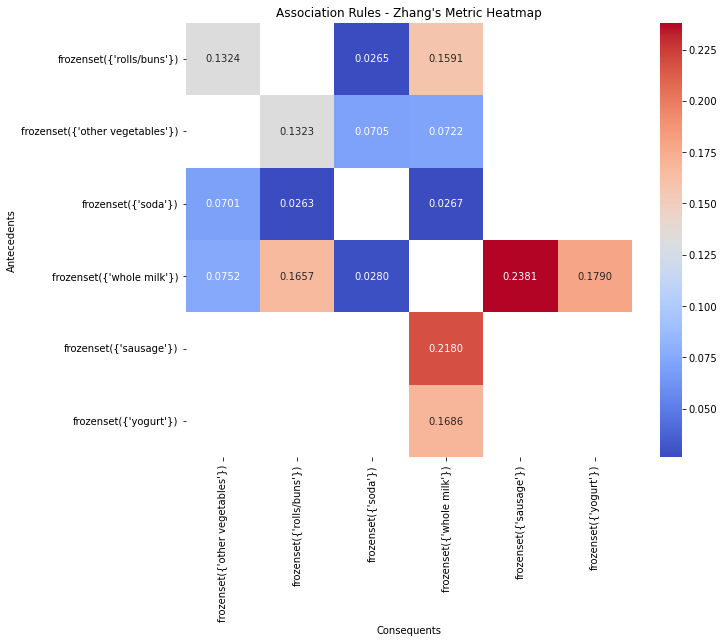

In [46]:
# Extracting the columns for antecedents, consequents, and Zhang's metric from the rules DataFrame
data = rules[['antecedents', 'consequents', 'zhangs_metric']]

# Reformatting the data to create a pivot table for visualization
pivot = data.pivot(index='antecedents', columns='consequents', values='zhangs_metric')

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt='.4f')
plt.title("Association Rules - Zhang's Metric Heatmap")
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()

## Interpretation:

1. A moderate association exists between 'Other Vegetables' and 'Rolls/Buns' (Zhang's metric value: 0.1324).
2. There's a moderate association between 'Soda' and 'Whole Milk' (Zhang's metric value: 0.028).
3. There's a relatively strong association between 'Whole Milk' and 'Sausage' (Zhang's metric value: 0.2381).
4. A moderate association exists between 'Whole Milk' and 'Yogurt' (Zhang's metric value: 0.179).
5. Empty cells (containing 0) indicate no association or very weak association between those particular pairs of items based on Zhang's metric.
6. The diagonal line represents the same item compared to itself, so the value is typically 1 (indicating a perfect association with itself).

## Recommendations

1. Strategic Item Placement: Arrange webpages to showcase associated items like 'Whole Milk' and 'Sausage' in close proximity or suggest them together on the same page. Highlight bundles such as 'Other Vegetables' and 'Rolls/Buns' on the homepage or category pages to catch customer attention. Display visually related items like 'Whole Milk' and 'Yogurt' side by side or in a carousel to encourage exploration.

2. Enhanced Product Pages: Include related items such as 'Soda' and 'Whole Milk' or 'Whole Milk' and 'Yogurt' on individual product pages. Showcase promotions that pair associated products, signaling value in purchasing them together.

3. Checkout & Cart Optimization: During checkout, recommend complementary items such as 'Sausage' or 'Yogurt' to the ones in the cart. Offer discounts when customers add associated items like 'Other Vegetables' to their carts, incentivizing additional purchases.

4. Dynamic Page Elements: Utilize user behavior data to dynamically adjust item placements for each visitor, showcasing items based on their browsing history or past purchases. Curate themed collections featuring associated items such as 'Whole Milk' and 'Soda' for seasonal campaigns or holidays.

#### Further Analysis using other measures

In [35]:
# creating more rules based on conditions
rule1 = sub_list[(sub_list['lift'] >=1.18) & (sub_list['confidence'] >= 0.1)]
rule1

,antecedents,consequents,support,confidence,lift,zhangs_metric
11,(sausage),(whole milk),0.010317,0.174397,1.258061,0.218024
14,(whole milk),(yogurt),0.014049,0.101346,1.182284,0.178992
15,(yogurt),(whole milk),0.014049,0.163892,1.182284,0.168635


In [37]:
#creating rules based on condition 
rule2 = sub_list[sub_list['zhangs_metric'] >= 0.2]
rule2

,antecedents,consequents,support,confidence,lift,zhangs_metric
10,(whole milk),(sausage),0.010317,0.074426,1.258061,0.238138
11,(sausage),(whole milk),0.010317,0.174397,1.258061,0.218024


In [38]:
# Transforming the data to fit the Apriori format
#transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index(name='items')
#transactions

In [39]:
#Coverting items to one-hot encoded format
#te = TransactionEncoder()
#te_ary = te.fit(transactions['items']).transform(transactions['items'])
#df_encoded =pd.DataFrame(te_ary, columns = te.columns_)
#df_encoded

In [40]:
#Finding frequently purchased item sets
#frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
 

In [41]:
#Generating Association Rules
#my_rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.1)
#my_rules

In [42]:
#counting no of whole milk sold
#df_encoded['whole milk'].sum()

In [43]:
#counting no of rolls/buns sold
#df_encoded['rolls/buns'].sum()

In [44]:
#counting no of soda sold
#df_encoded['soda'].sum()

In [45]:
#counting no of other vegetables sold
#df_encoded['other vegetables'].sum()